In [41]:
import numpy as np 
import matplotlib.pyplot as plt 
from n_arm_bandit import NArmedBandit

# Distribution

In [42]:
sample1 = np.random.normal(loc=10, scale=10, size=(1000))

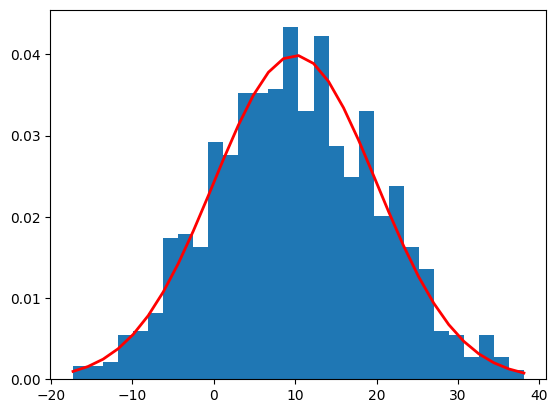

In [43]:
count, bins, _ = plt.hist(sample1, 30, density=True)
plt.plot(bins, 1/(10 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 10)**2 / (2 * 10**2) ),
         linewidth=2, color='r')
plt.show()

In [44]:
print(f"Max: {sample1.max()} || Min: {sample1.min()} || Mean: {sample1.mean()}")

Max: 38.09747658932906 || Min: -17.273762701742477 || Mean: 10.124050998790871


# Examination of each lever 

In [45]:
bandit = NArmedBandit(arms=10, reel_numbers=3)

In [46]:
scoreboard = np.load("./scoreboard.npy")

In [47]:
for i in range(scoreboard.shape[0]): 
    print(f"Examine lever number: {i}")
    for j in range(scoreboard.shape[1]): 
        print(f"symbol: {bandit.symbols[j]} has count: {scoreboard[i][j]}")

Examine lever number: 0
symbol: ~ has count: 0.0
symbol: ! has count: 0.0
symbol: @ has count: 901.0
symbol: # has count: 861.0
symbol: $ has count: 0.0
symbol: % has count: 0.0
symbol: ^ has count: 0.0
symbol: & has count: 0.0
symbol: * has count: 0.0
symbol: S has count: 0.0
Examine lever number: 1
symbol: ~ has count: 798.0
symbol: ! has count: 254.0
symbol: @ has count: 12.0
symbol: # has count: 0.0
symbol: $ has count: 0.0
symbol: % has count: 0.0
symbol: ^ has count: 0.0
symbol: & has count: 14.0
symbol: * has count: 260.0
symbol: S has count: 756.0
Examine lever number: 2
symbol: ~ has count: 877.0
symbol: ! has count: 1.0
symbol: @ has count: 0.0
symbol: # has count: 0.0
symbol: $ has count: 0.0
symbol: % has count: 0.0
symbol: ^ has count: 0.0
symbol: & has count: 0.0
symbol: * has count: 2.0
symbol: S has count: 868.0
Examine lever number: 3
symbol: ~ has count: 0.0
symbol: ! has count: 0.0
symbol: @ has count: 0.0
symbol: # has count: 39.0
symbol: $ has count: 852.0
symbol: 

# Learning with agent

In [48]:
class BanditAgent: 
    def __init__(self, name, actions: list, epsilon = None): 
        self.name = name
        self.actions = actions 
        self.action_size = len(actions)
        
        self.action_value_table = np.zeros_like(actions)
        self.action_count_table = np.zeros_like(actions) 

        self.epsilon = epsilon

    def update_action_count_table(self, action_index) -> None: 
        self.action_count_table[action_index] += 1

    def update_action_value_table(self, action_index: int, reward) -> None: 
        k = self.action_count_table[action_index] + 1

        # average reward estimate 
        self.action_value_table[action_index] = self.action_value_table[action_index] + ((1 / k) * (reward - self.action_count_table[action_index]))

        # update action count 
        self.update_action_count_table(action_index)
    
    def choose_action_from_value_table(self) -> int: 
        if self.epsilon: 
            choices = np.array([0, 1])
            choice = np.random.choice(choices, size=None, p=[1.0 - self.epsilon, self.epsilon])

            if choice == 0: 
                action_index = np.argmax(self.update_action_value_table)
                print("greedy")
            else: 
                action_index = np.random.randint(0, self.action_size + 1)
                print("explore")

        else: 
            action_index = np.armgax(self.update_action_value_table)
        
        return action_index 

In [49]:
agent = BanditAgent(name="agent", actions=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], epsilon=0.1)

In [50]:
for i in range(20): 
    a = agent.choose_action_from_value_table()

greedy
greedy
explore
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
greedy
